# **CosmiCode-Internship Week-7**

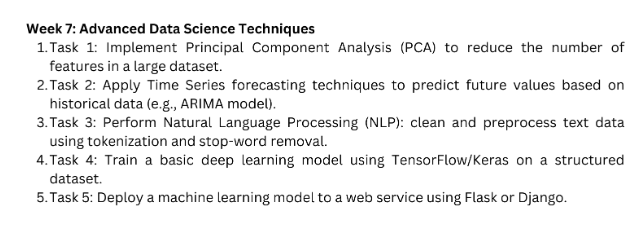

### Task-1: Principle Component Analysis


- PCA is a dimensionality reduction technique used to reduce the number of variables in a dataset while retaining as much variability (information) as possible.
- It works by transforming the original variables into a smaller set of new variables called principal components, which are linear combinations of the original variables.


**Why do we do PCA?**
- Simplify Complex Data: Reduce the number of features to make data more manageable without losing significant information.
- Reduce Noise: Remove less important components that might add noise to the model.
- Speed Up Computation: Fewer features mean faster model training and inference.
- Avoid Multicollinearity: PCA removes correlated features, which can confuse some machine learning algorithms.

**How Does PCA Work?**
- Center the Data: Subtract the mean from each feature to center the data at the origin.
- Calculate Covariance Matrix: This matrix captures how features vary together.
- Compute Eigenvalues and Eigenvectors:
- Eigenvalues tell us the importance of each component (variance explained).
- Eigenvectors define the direction of the components.
- Select Principal Components: Choose the top components that explain the most variance.
- Transform Data: Project the original data onto the selected principal components.

PCA is often used in preprocessing pipelines before applying machine learning algorithms. It ensures that data is represented compactly and effectively while removing redundancies.



In [3]:
import pandas as pd

# Define the column names as per the dataset description
column_names = [
    'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 'Magnesium',
    'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
    'Color_Intensity', 'Hue', 'OD280/OD315_of_Diluted_Wines', 'Proline', 'Class'
]

# Load the dataset
data_path = 'Datasets/wine/wine.data'
wine_data = pd.read_csv(data_path, header=None, names=column_names)

# Display the first few rows
wine_data.head()


,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315_of_Diluted_Wines,Proline,Class
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


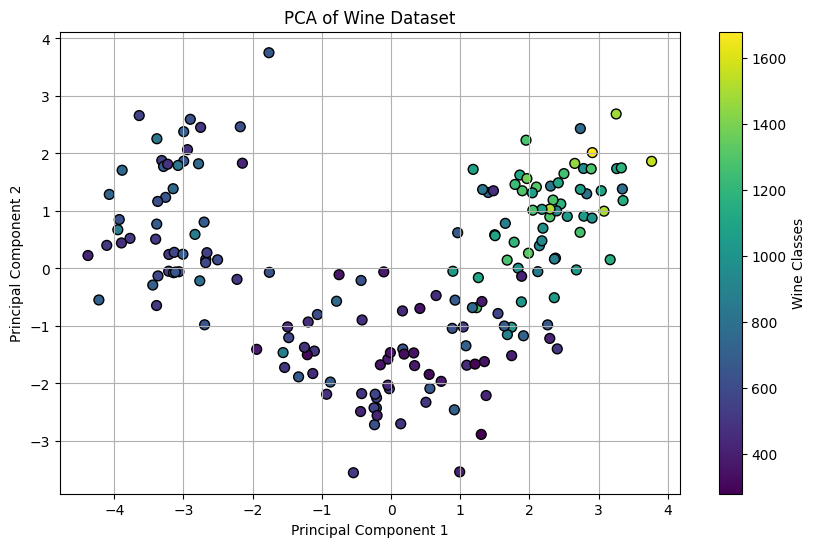

In [6]:
from sklearn.preprocessing import StandardScaler
X = wine_data.iloc[:, :-1]  # Exclude the target column
X_scaled = StandardScaler().fit_transform(X)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 components
principal_components = pca.fit_transform(X_scaled)


pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Target'] = wine_data['Class']  # Assuming 'Class' is the target column




import matplotlib.pyplot as plt

# Scatter plot with enhancements
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Target'], cmap='viridis', s=50, edgecolor='k')
plt.colorbar(scatter, label='Wine Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.grid(True)
plt.show()


In [7]:
pca_df.to_csv('pca_transformed_wine.csv', index=False)


### Task-2: Time series Forcasting

Time series forecasting is the process of using historical data to predict future values. The data is time-ordered, and patterns like trends and seasonality are extracted to make predictions.


- Predict Future Trends: Helps businesses anticipate demand, sales, or any measurable metric.
- Optimize Resources: For example, staffing based on expected sales volume.
- Strategic Planning: Forecasting future events like stock prices or energy consumption.



ARIMA stands for AutoRegressive Integrated Moving Average. It is a widely used model for time series forecasting. Here's a breakdown:
- AR (AutoRegressive): This component uses the relationship between an observation and a number of lagged observations (past values).
- Example: Tomorrow’s temperature depends on today’s and yesterday’s.
- I (Integrated): Differencing is used to make the data stationary (remove trends).

- Example: Transform [10, 12, 14, 16] into [2, 2, 2] by subtracting consecutive values.
- MA (Moving Average): This component models the relationship between an observation and the residual error from a moving average model applied to lagged observations.



**Steps to Build an ARIMA Model**
- Stationarity Check: Use statistical tests (e.g., ADF Test) to check if the data is stationary.
- Parameter Selection: Choose AR (p), I (d), and MA (q) values using tools like ACF and PACF plots.
- Model Fitting: Train the model on historical data.
- Forecasting: Use the model to predict future values.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the time series dataset
data_path = 'Datasets/AirPassengers.csv'
df = pd.read_csv(data_path, header=0, index_col=0, parse_dates=True)

# Display the first few rows
print(df.head())



            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


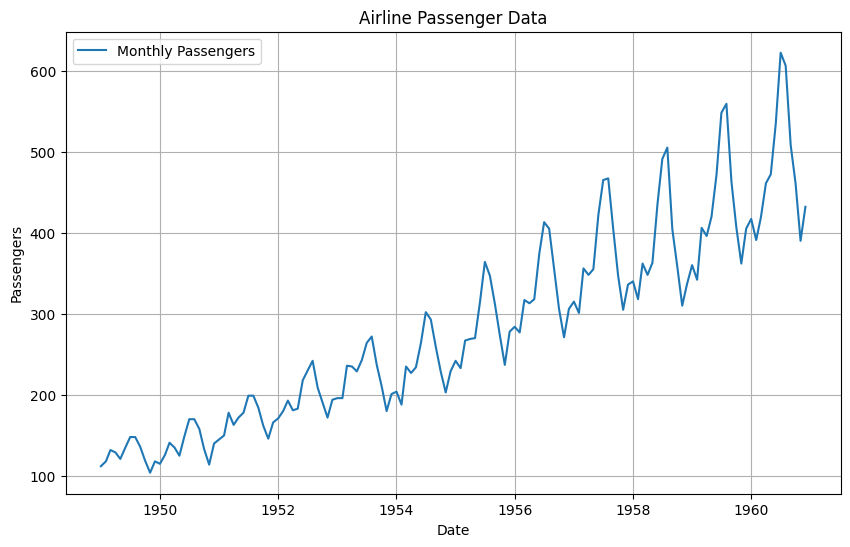

In [11]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df, label='Monthly Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Airline Passenger Data')
plt.legend()
plt.grid()
plt.show()


In [12]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df['#Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:', result[4])

# Interpret the results
if result[1] > 0.05:
    print("The data is not stationary. Differencing is needed.")
else:
    print("The data is stationary.")


ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
The data is not stationary. Differencing is needed.


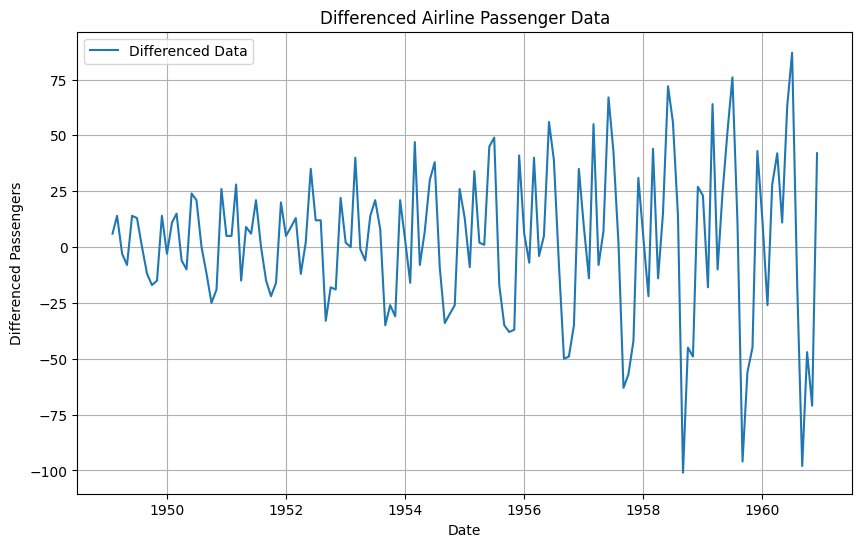

In [13]:
df_diff = df.diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(df_diff, label='Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Passengers')
plt.title('Differenced Airline Passenger Data')
plt.legend()
plt.grid()
plt.show()


In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load your data
df = pd.read_csv("Datasets/AirPassengers.csv")

# Ensure the 'Month' column is in datetime format and set it as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Optionally specify the frequency explicitly
df = df.asfreq('MS')  # Monthly start frequency

# Fit the ARIMA model
model = ARIMA(df['#Passengers'], order=(1, 1, 1))  # Example (p, d, q)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Sat, 28 Dec 2024   AIC                           1394.683
Time:                        03:04:37   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

Forecasted Values:
1961-01-01    475.735059
1961-02-01    454.996073
1961-03-01    464.830415
1961-04-01    460.167010
1961-05-01    462.378378
1961-06-01    461.329756
1961-07-01    461.827008
1961-08-01    461.591213
1961-09-01    461.703026
1961-10-01    461.650005
1961-11-01    461.675148
1961-12-01    461.663225
Freq: MS, Name: predicted_mean, dtype: float64


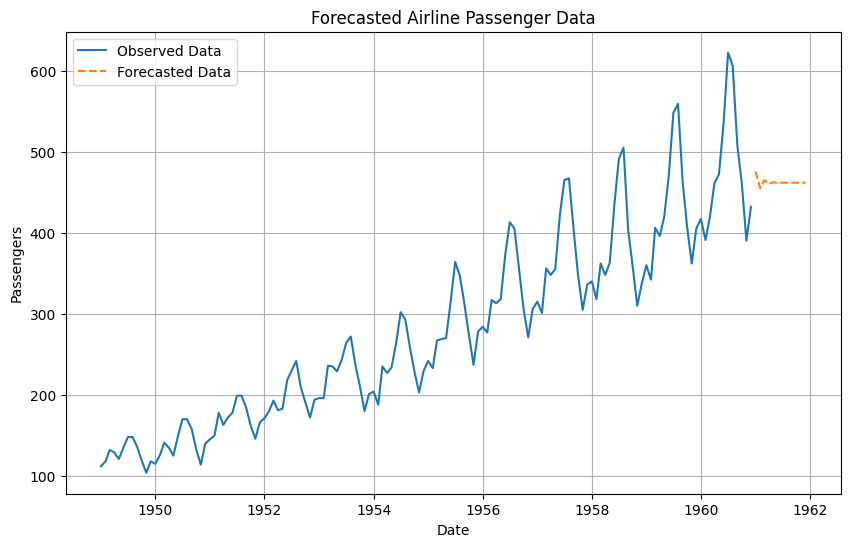

In [16]:
# Forecast future values
forecast = model_fit.forecast(steps=12)  # Forecast 12 future steps
print("Forecasted Values:")
print(forecast)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df, label='Observed Data')
plt.plot(forecast, label='Forecasted Data', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Forecasted Airline Passenger Data')
plt.legend()
plt.grid()
plt.show()


### Task-3: NLP

NLP is a field of AI that focuses on enabling computers to understand, interpret, and respond to human language in a meaningful way.

- Tokenization is the process of breaking text into smaller units called tokens (e.g., words, sentences).

- Stop words are common words like "is", "and", "the" that do not carry much meaning in most contexts.

Why Tokenization?

- Prepares Text for Analysis: Converts raw text into structured data for processing.
- Facilitates Feature Extraction: Makes it easier to perform tasks like counting word frequencies or analyzing sentiments.


- Reduce Noise: Removes irrelevant information.
- Focus on Meaningful Words: Focuses on words that add context.

**Benefits of Tokenization and Stop Word Removal**
- Improves Model Performance: Less noise means better predictions.
- Reduces Dimensionality: Smaller vocabulary reduces computation.
- Better Interpretability: Focuses on the core message of the text.

In [26]:
from nltk.tokenize import word_tokenize

# Example text
text = "This is a sample text for tokenization."
tokens = word_tokenize(text)
print(tokens)


['This', 'is', 'a', 'sample', 'text', 'for', 'tokenization', '.']


In [27]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])


In [28]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda x: [ps.stem(word) for word in x])


In [30]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional: Adds additional language support for WordNet


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...


True

In [31]:
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Example text for lemmatization
text = "The cats are running in the gardens."

# Tokenize the text
tokens = WordPunctTokenizer().tokenize(text)

# Apply lemmatization
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
print("Lemmatized Tokens:", lemmatized_tokens)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\junai\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Lemmatized Tokens: ['The', 'cat', 'are', 'running', 'in', 'the', 'garden', '.']


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['tokens'].apply(lambda x: ' '.join(x)))
print(X.toarray())


[[0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0]
 [0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1]]


### Task-4: Deep Learning Model


**Why Use Deep Learning?**
- Extract Patterns: Finds patterns in data that traditional algorithms might miss.
- Handle Complex Data: Works well with images, text, and large datasets.
- End-to-End Learning: Requires less feature engineering.

In [5]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

# Load the dataset (use wine dataset for demonstration)
data = pd.read_csv("Datasets/wine/wine.data", header=None)
X = data.iloc[:, 1:].values  # Features
y = data.iloc[:, 0].values   # Target

# Fix the target labels to be zero-indexed
y = y - 1  # Convert labels from 1, 2, 3 to 0, 1, 2

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the Model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes for wine dataset
])

# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=4)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Save the Model
model.save("basic_model.h5")


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5262 - loss: 0.9828 - val_accuracy: 0.9167 - val_loss: 0.5498
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9068 - loss: 0.5276 - val_accuracy: 0.9722 - val_loss: 0.2692
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9575 - loss: 0.2655 - val_accuracy: 0.9722 - val_loss: 0.1310
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9862 - loss: 0.1700 - val_accuracy: 1.0000 - val_loss: 0.0756
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0973 - val_accuracy: 1.0000 - val_loss: 0.0453
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0611 - val_accuracy: 1.0000 - val_loss: 0.0293
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0421 - val_accuracy: 1.0000 - val_loss: 0.0205
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0306 - val_accuracy: 1.0000 - val_loss:

Test Accuracy: 100.00%


### Task-5: Deploy ML model to a webservice using flask or django

In [5]:
from flask import Flask, request, jsonify
import numpy as np
from tensorflow.keras.models import load_model

# Initialize Flask App
app = Flask(__name__)

# Load the Pre-trained Model
model = load_model('basic_model.h5')

@app.route('/')
def home():
    return """
    <h1>Welcome to the Wine Prediction API</h1>
    <p>This API uses a Machine Learning model to predict the class of wine based on certain features.</p>
    <p>To use the API:</p>
    <ul>
        <li>Use the <code>/predict</code> endpoint with a <code>features</code> query parameter.</li>
        <li>Example: <code>http://127.0.0.1:5000/predict?features=13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050</code></li>
    </ul>
    <p>The features are:</p>
    <ol>
        <li>Alcohol</li>
        <li>Malic acid</li>
        <li>Ash</li>
        <li>... (add all 13 features)</li>
    </ol>
    """

@app.route('/predict', methods=['GET'])
def predict():
    # Get features from query parameters
    features = request.args.get('features')
    if not features:
        return jsonify({"error": "No features provided in the URL."}), 400
    
    try:
        # Convert the query parameter string into a list of floats
        features = [float(x) for x in features.split(',')]
        
        # Reshape for prediction
        features = np.array(features).reshape(1, -1)
        
        # Make a prediction
        prediction = model.predict(features)
        predicted_class = np.argmax(prediction) + 1  # Adjusted for 1-based indexing
        
        # Return the result with explanation
        return jsonify({
            "message": "Prediction completed successfully!",
            "prediction": f"The predicted wine class is {predicted_class}",
            "details": {
                "class_1": "Wine A - Balanced and smooth.",
                "class_2": "Wine B - Rich with fruity tones.",
                "class_3": "Wine C - Dry and full-bodied."
            },
            "explanation": "Wine class 1 means 'A', 2 means 'B', and 3 means 'C'."
        })
    except Exception as e:
        return jsonify({"error": f"Invalid input: {str(e)}"}), 500

# Run the App
if __name__ == '__main__':
    app.run(debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


INFO:werkzeug:127.0.0.1 - - [28/Dec/2024 13:57:18] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


INFO:werkzeug:127.0.0.1 - - [28/Dec/2024 13:57:30] "GET /predict?features=13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/Dec/2024 13:58:53] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


INFO:werkzeug:127.0.0.1 - - [28/Dec/2024 13:59:05] "GET /predict?features=13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050 HTTP/1.1" 200 -
